# Calcium Flex Analysis using Python #

*Author Lawrence Collins*

A step-by-step guide on how to analyse flex data via the use of a bespoke Python package. This notebook contains all the information on how to get started using the software; with further details contained in the documentation.<br><br>If you are new to the program I would recommend going through this notebook and executing each cell containing the code one at a time. Have a play around with the functions to get a feel for how things work. All of the code is hidden behind the scenes leaving the user with a selection of simple commands that carry out highly customisable operations on their assay data.

# Single plate processing #

## Importing the package ##
The Jupyter Notebook gains access to the Calcium Flex package via Python's import system. Execute the following cell (ctrl+enter) to add the calcium flex analysis functionality to the notebook.

In [1]:
from calciumflexanalysis import calcium_flex as cal

In [2]:
from platemapping import plate_map

## Uploading Flex data ##
For each plate, the package requires the raw data .txt file and a corresponding plate map. The plate map contains a description of each well of the assay, allowing easy categorisation the data.<br><br>
Within the function 'calciumflexanalysis.CaFlexPlate', the user must stipulate several constraints, additional (optional) attributes can also be stated.

#### Mandatory ####
```
 - raw_data: The raw data .txt file
 - plate_map_file: The plate map .csv file, adhering to either the 'short' or 'long' template
 - inject: The time at which the agonist (e.g. englerin A) was injected into the assay
 - data_type: The type of data file being used, described using the colloquial terms 'new' and 'old'
```
#### Optional ####
```
 - map_type: The type of plate map template being used, 'short' or 'long' - defaults to 'short'
 - size: Size of the well plate - defaults to 96
 - valid: Validates all wells in the assay - defaults to True
 - title: Title of the assay
```
_update:_ if units of 'uM' (or u-anything for that matter) are given in the 'Concentration Units' column, the code will automatically present the u as $ \mu $.

In [3]:
# text file to be read in (raw file from machine)
datafile = '291019 TPC4sYFP2 EA 30 nM act IBP74 inhib 3 nM to 3 uM.txt' 

# plate map csv file updated by user (either the 'short' or 'long' template)
mapcsv = 'EA 30 nM act IBP74 3nM to 3 uM.csv' 

# insert the 2 files into the 'CaFlexAnalysis' class 
# it is recommended the user name the plates via the system 'plate1', 'plate2', etc.
plate1 = cal.CaFlexPlate(raw_data = datafile, plate_map_file = mapcsv, inject = 60, data_type = 'new')

Uploaded!


## Visual inspection ##
Two functions assist the user in checking the arrangment of the well plate and for any anomalous readings.<br>
### see_plate() ###
'see_plate' allows the user to quickly confirm whether they have correctly updated the plate map template. The label and color coding can be customised using the attributes 'labelby' and 'colorby', defaulting to 'Type'. 

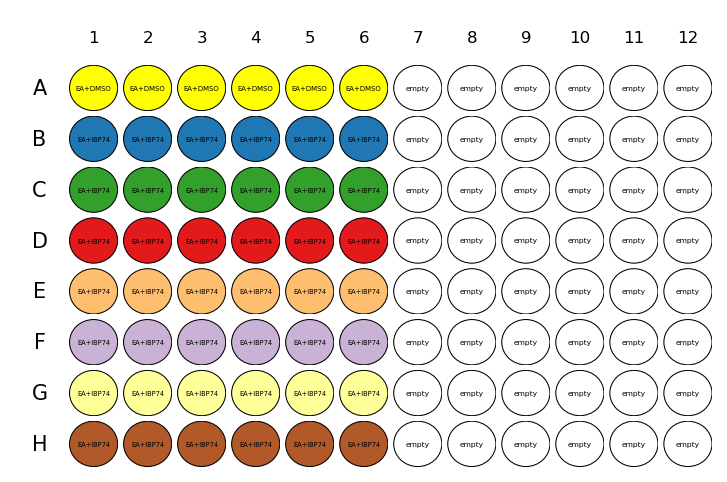

In [4]:
plate1.see_plate(colorby = 'Concentration', labelby = 'Contents')

### visualise_assay() ###
'visualise assay', like see_plate(), provides a simple visual check for the user. The function is different, and more useful, in that it plots the raw data for each well across the assay. Again, the user can stipulate the arguments 'colorby' and 'labelby'. The user must also explicitly state whether the y axis will be shared across the entire assay, using 'share_y = True' or 'share_y = False'.

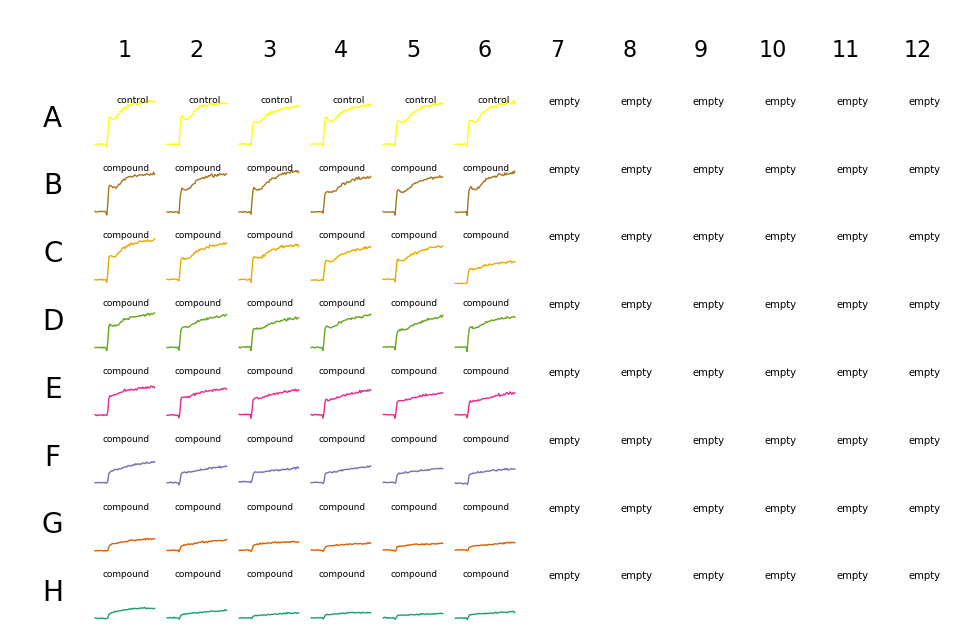

In [5]:
plate1.visualise_assay(share_y = True, colorby = 'Concentration')

### a quick side note: calling for help ###
If you would like more information about a specific function, simply call help on it as follows:

In [6]:
help(cal.CaFlexPlate.see_plate)

Help on function see_plate in module calciumflexanalysis.calcium_flex:

see_plate(self, title='', export=False, cmap='Paired', colorby='Type', labelby='Type', dpi=150)
    Returns a visual representation of the plate map.
    
    The label and colour for each well can be customised to be a variable, for example 'Compound', 'Protein', 'Concentration', 'Concentration Units', 'Contents' or 'Type'. The size of the plate map used to generate the figure can be either 6, 12, 24, 48, 96 or 384. 
    :param size: Size of platemap, 6, 12, 24, 48, 96 or 384, default = 96
    :type size: int    
    :param export: If 'True' a .png file of the figure is saved, default = False
    :type export: bool
    :param title: Sets the title of the figure, optional
    :type title: str
    :param cmap: Sets the colormap for the color-coding, default = 'Paired'
    :type cmap: str
    :param colorby: Chooses the parameter to color code by, for example 'Type', 'Contents', 'Concentration', 'Compound', 'Protein'

Note how you first call the package 'cal', then the class object - in this instance 'CaFlexPlate' - and then the module you require more information on 'see_plate'.

## Invalidation ##
Visualising the assay allows the user to note any anomalous recordings. The user can then choose to have a closer look at the dodgy data and invalidate if necessary. 

### see_wells() ###
'see_wells()' plots the raw data of specific wells from the assay. The user can again label, color and share the y axes of the plots as they see fit.

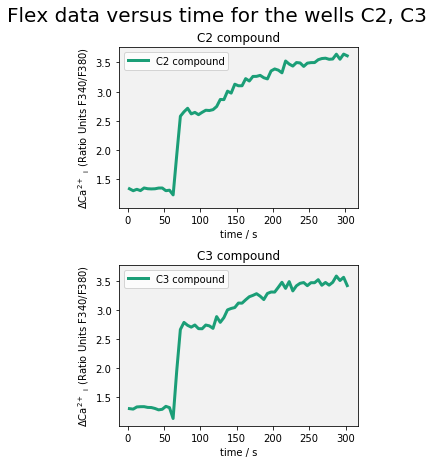

In [7]:
# specific wells that look dodgy
dodgy = "C2", "C3"
type(dodgy)
plate1.see_wells(dodgy)

The user can invalidate individual wells or entire rows and columns.

In [8]:
plate1.invalidate_wells(["C2", "C3"])

plate1.invalidate_rows('B')

plate1.invalidate_cols(6)

['C2', 'C3'] invalidated
Row B invalidated
Columns 6 invalidated


Visualising the assays will clearly show which wells are now invalidated.

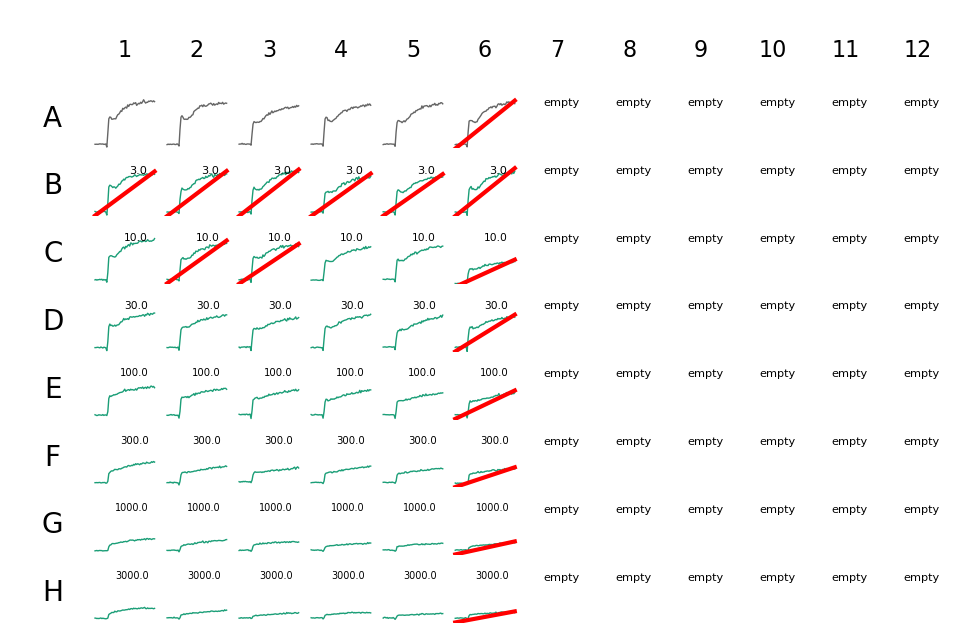

In [9]:
plate1.visualise_assay(labelby = 'Concentration', share_y = True) 

## Data Analysis ##
### Baseline Correction: baseline_correct() ###
The user can now baseline correct the data if they wish. 

In [10]:
plate1.baseline_correct()

Baseline corrected! See self.processed_data['baseline_corrected']


### get_window() ###
The program can automatically find the flattest mean gradient across the plate within a 10 point window for the following plateau calculations. The user can stipulate what data the window will be calculated from, either 'ratio' or 'baseline_corrected'

In [11]:
plate1.get_window('baseline_corrected')

### def_window() ###
If the user does not deem the calculated window suitable, it is possible to manually define the point from which the response amplitudes will be calculated. The user must state the *start* time point and the data from which the window will be taken, 'ratio' or 'baseline_corrected'.

In [12]:
# # uncomment to manually set the window
# plate1.def_window(200, 'baseline_corrected')
plate1.window # .window returns the index from which the window will be taken

(41, 51)

### plot_conditions() ###
'plot_conditions' plots the change in calcium flux for each mean condition versus time. The user can define which data will be plotted, either 'ratio' or 'baseline_corrected'. The window from which the response amplitude will be calculated can also be shown on the graph, using *show_window = True*.<br>
Multiple controls can be plotted on the graph using the argument _control_ (default = \['control'\]). Make sure this is added as a list, e.g. control = \['control-1', 'control-2'\]. Controls can be blocking from being plotted using *show_control = False.*

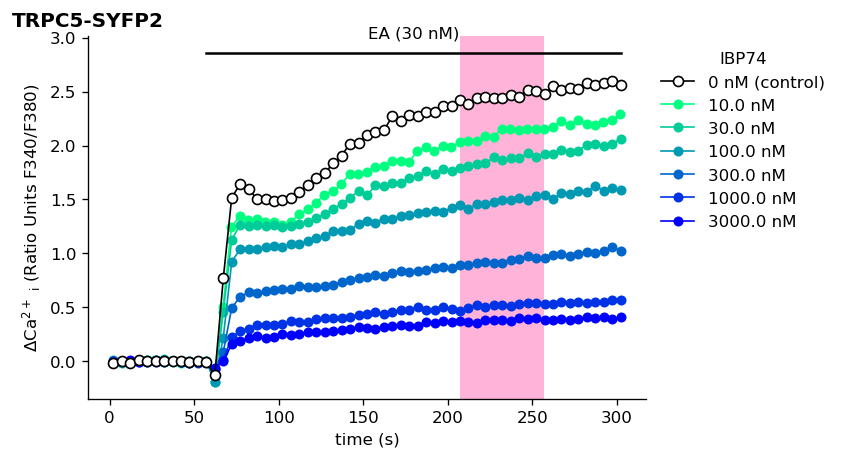

In [13]:
plate1.plot_conditions('baseline_corrected', activator = "EA (30 nM)", title = 'TRPC5-SYFP2', show_window = True)


_update:_ There is now an option to set 'unique markers'. Simply add the argument unique_markers = True. The markers used can be changed by updating the 'markers_list' attribute, default = ["o", "^", "s", "D", "p", "*", "v"]. See https://matplotlib.org/3.1.0/api/markers_api.html for information on the markers that can be used.

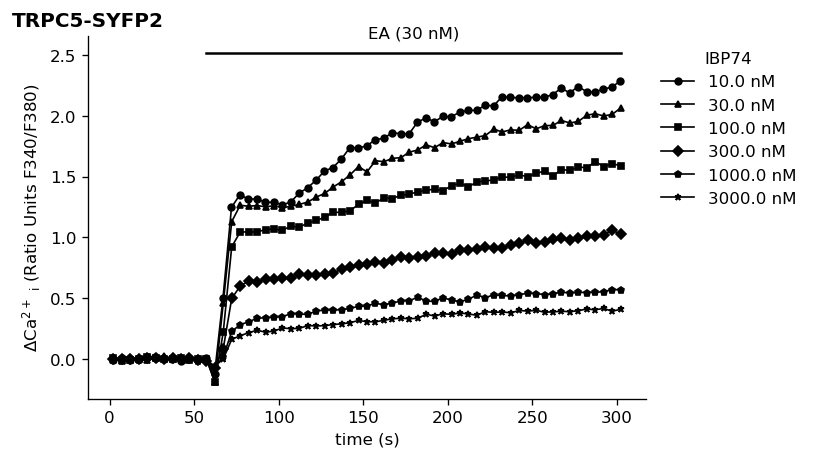

In [14]:
plate1.plot_conditions('baseline_corrected', activator = "EA (30 nM)", title = 'TRPC5-SYFP2', show_window = False, 
                       unique_markers = True, show_control = False)


### Amplitudes ###
'amplitude()' calculates the response amplitude of each well. Again, the user must specify which data they want to use. 

In [16]:
plate1.amplitude('baseline_corrected')

Amplitudes calculated from baseline_corrected. See self.processed_data['plateau']['data']


### Normalisation ###
If the user so desires, they can normalise their data to the plate control (where Type = 'control' on your plate map).

In [17]:
plate1.normalise()

C:\Users\lawre\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,amps_normed
A1,107.649390
A2,104.355784
A3,92.559173
A4,95.762802
A5,99.672850
...,...
H8,NaN
H9,NaN
H10,NaN
H11,NaN


### mean_amplitude() ###
Amplitudes for each condition are collected and averaged. The user can chose whether they use the normalised data.

In [18]:
plate1.mean_amplitude(use_normalised = True)

C:\Users\lawre\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Protein,Type,Compound,Concentration,Concentration Units,amps_normed,amps_normed_error
0,-1,empty,-1,-1.0,-1,NaN,NaN
1,TRPC5,compound,IBP74,10.0,nM,85.855872,6.377952
2,TRPC5,compound,IBP74,30.0,nM,75.903861,2.232150
3,TRPC5,compound,IBP74,100.0,nM,60.313038,3.126894
4,TRPC5,compound,IBP74,300.0,nM,37.801207,3.054347
5,TRPC5,compound,IBP74,1000.0,nM,21.043494,2.455948
6,TRPC5,compound,IBP74,3000.0,nM,15.623952,2.931612
7,TRPC5,control,-1,-1.0,nM,100.000000,2.746933


### Curve fitting: plot_curve() ###
Dose-response curves fitted to either an IC$_{50}$ or EC$_{50}$ can now be plotted using the mean amplitudes. The user must state whether they want to do an 'ic50' or 'ec50' fit. The function also includes several optional arguments:
```
 - combine = True: plots multiple compounds and/or proteins on the same figure, combine = False plots each curve on a separate figure
 - error_bar = True: reveals error bars at each concentration
 - title: sets the figure title
 - show_top_bot = True: reveals the top and bottom values from the curve fitting function
 - The user can explicitly stipulate which proteins and or/compounds are plotted using proteins = [list of proteins] and compounds = [list of compounds] (n.b. the user does not have to state this if they want to plot every protein/compound)
 - activator: The agonist injected into the assay. This is especially useful when presenting normalised data; the y axis label will contain the agonist name if stated.
 ```


C:\Users\lawre\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\lawre\Documents\PROJECT\developing\calciumflexanalysis\calcium_flex.py:47: RuntimeWarning: invalid value encountered in power
  z=(ic50/x)**hill


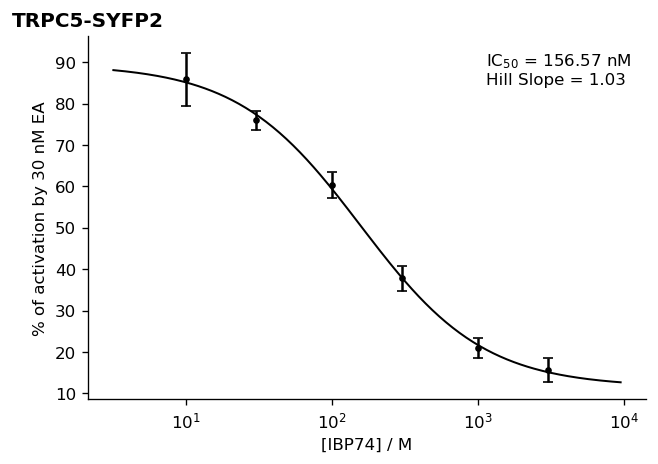

In [19]:
plate1.plot_curve('ic50', activator = '30 nM EA', title = "TRPC5-SYFP2", use_normalised = True)

### export_data() ###
This method will export data produced at each stage of the analysis to an excel document. The data sets are placed into separate sheets. <br>
The title of the excel file can be set as an argument within the export_data function. If no title is specified, the resulting document will be named after the title of the plate (the title of the plate can be set in the first step - see top of the page).

In [20]:
# plate1.export_data("test_export.xlsx")

# Multi-plate processing #
It is also possible to group together several assays for a combined analysis. This uses the 'multiplate' subpackage - if you want to call help on one of these functions, call **'help(mp.CaFlexGroup.*insert_function_here*)'.**
## Importing the package ##
Normally this would be done at the start of the notebook. 

In [21]:
from calciumflexanalysis import multiplate as mp

## Uploading the flex data ##
As before, the user must upload the raw text file and a corresponding plate map for each well plate.

In [22]:
# text files to be read in 
datafile = '291019 TPC4sYFP2 EA 30 nM act IBP74 inhib 3 nM to 3 uM.txt' 
datafile2 = '07052019 C4sYFP2 IBP21 IBP23 INHIBITION 300 nM to 1 nM.txt'
# plate map csv file updated by user (either the 'short' or 'long' template)
mapcsv = 'EA 30 nM act IBP74 3nM to 3 uM.csv' 
mapcsv2 = 'different compounds.csv'
# insert the 2 files into the 'CaFlexAnalysis' class
plate1 = cal.CaFlexPlate(raw_data = datafile, plate_map_file = mapcsv, inject = 60, data_type = 'new')
plate2 = cal.CaFlexPlate(raw_data = datafile2, plate_map_file = mapcsv2, inject = 60, data_type = 'old')

Uploaded!
Uploaded!


The resulting CaFlexPlate objects can then be added to a 'CaFlexGroup', which allows the user to do grouped operations on all plates simultaneously. 

In [23]:
plates = mp.CaFlexGroup([plate1, plate2])

Most of the operations performed for a single plate are essentially the same as those for the resulting CaFlexGroup object, albeit with some minor alterations!
## Visual Inspection ##
### titles and accessing individual plates ###
The user may find it useful to know what the title of each plate is. These are automatically named after the raw data files, however can be retitled using simple dictionary indexing. This sort of indexing to access individual plates can be applied elsewhere in the package. 

In [24]:
plates.titles

{'plate_1': '291019 TPC4sYFP2 EA 30 nM act IBP74 inhib 3 nM to 3 uM',
 'plate_2': '07052019 C4sYFP2 IBP21 IBP23 INHIBITION 300 nM to 1 nM'}

In [25]:
plates.titles['plate_1'] # indexing 'plate_1' accesses its title. 

'291019 TPC4sYFP2 EA 30 nM act IBP74 inhib 3 nM to 3 uM'

The user can then simply set the indexed plate title to another string:

In [26]:
plates.titles['plate_1'] = 'my favourite plate' # reset the title
plates.titles # show all titles 

{'plate_1': 'my favourite plate',
 'plate_2': '07052019 C4sYFP2 IBP21 IBP23 INHIBITION 300 nM to 1 nM'}

### visualise_plates() and see_plates() ###
These are the sister functions of visualise_assay() and see_plate(). The same arguments such as 'share_y', 'labelby' and 'colorby' apply here. 

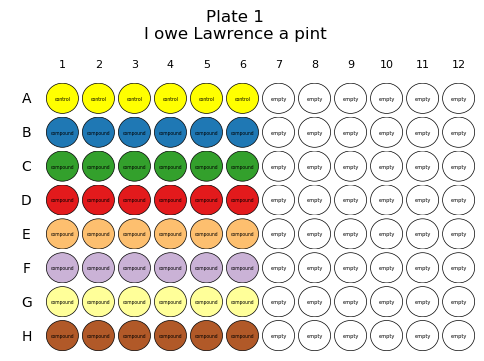

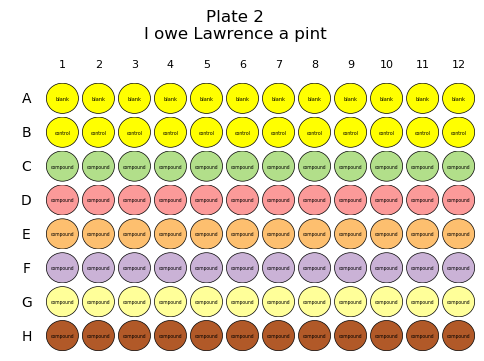

In [27]:
plates.see_plates(title = 'I owe Lawrence a pint', colorby = 'Concentration')

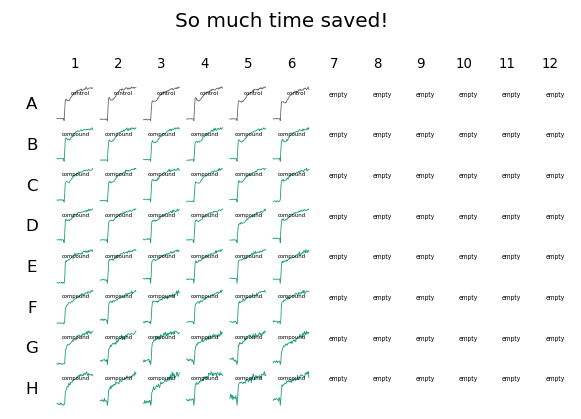

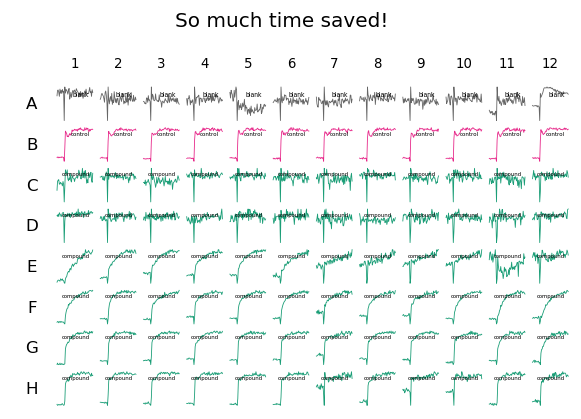

In [28]:
plates.visualise_plates(share_y = False, title = "So much time saved!", dpi = 120)

## Data analysis of multiple plates ##
As aforementioned, this works in much the same way as for the analysis of an individual plate, however it is important to note a couple of minor differences. Some functions, like 'see_plates' and 'visualise_plates' essentially do their job by performing their function on each plate instance in the group. Other functions, as described below, may collate data from each plate and perform a grouped operation. <br>
This will become handy, for example, if the user would like to analyse data for an individual compound that is spread over multiple plates. 
### baseline_correct() ###
This will baseline correct each plate separately. If you want to have a look at the numbers, the baseline corrected ata can be accessed at self.data\['baseline_corrected\]\[plate_(insert number)]. For defining the window, grouping data, plotting conditions, and calculating the amplitudes, you will have a choice to use 'baseline_corrected' or 'ratio'.

In [29]:
plates.baseline_correct()

Baseline corrected! See self.processed_data['baseline_corrected']
Plate 1
Baseline corrected! See self.processed_data['baseline_corrected']
Plate 2


### get_window() ###
Finds the lowest overall mean gradient across a ten time point window post injection for the plates.

In [30]:
plates.get_window('baseline_corrected')

(46, 56)

### def_window() ###
Manually sets each plateau window.

In [31]:
plates.def_window(210, 'baseline_corrected')

all windows equal, self.window updated


(42, 52)

### plot_conditions() ###
This plots each mean condition _for each plate_ as well as each protein and compound, versus time. <br>

With this and the following plotting conditions, the user has the option to plot which protein/compound combinations they would like to plot. All this requires is adding the attribute proteins = \[insert_name, insert_name\] or compounds = \[insert_name\]. The square brackets must be used and multiple names can be inserted. 

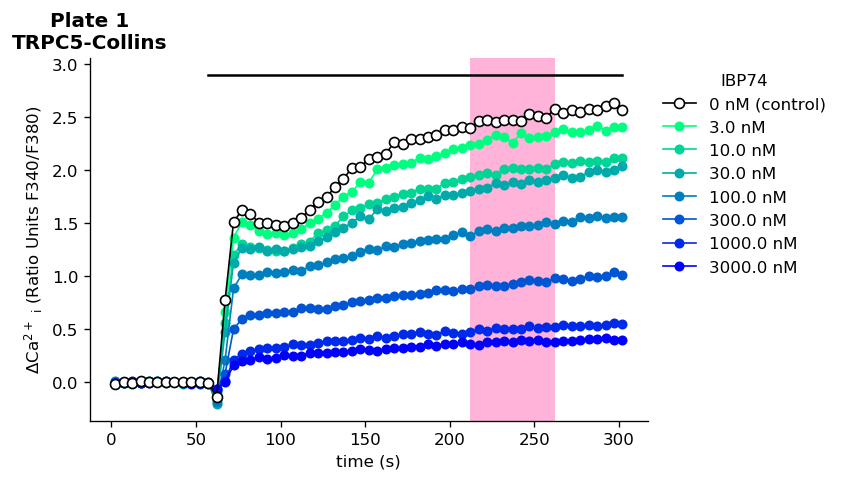

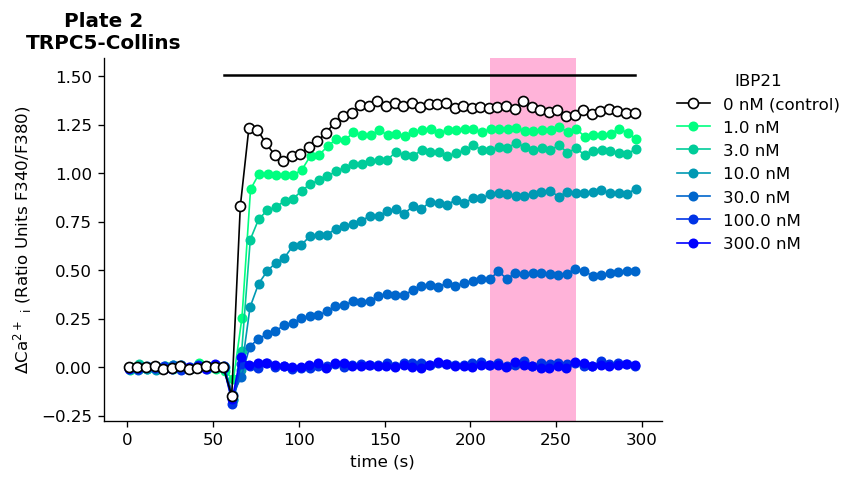

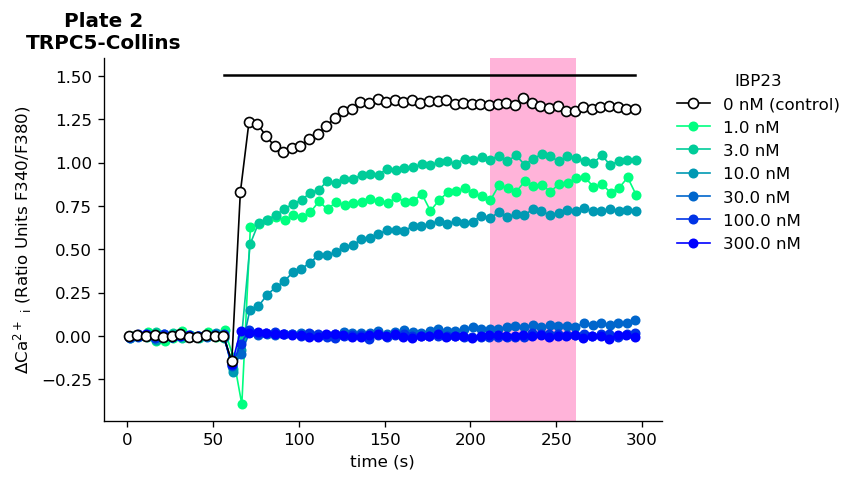

In [32]:
plates.plot_conditions('baseline_corrected', show_window = True, title = "TRPC5-Collins", error = False)

### amplitude() ###
Calculates the response amplitude versus time. This function will simultaneously collate the data to self.data\['plateau'\]\['data'\] as well as updating each plate object. This makes it handy for the user, giving the option to either keep each plate separate or combine the data.

In [33]:
plates.amplitude('baseline_corrected')

Amplitudes calculated from baseline_corrected. See self.processed_data['plateau']['data']
self.processed_data['plateau']['data'] updated for plate 1.
Amplitudes calculated from baseline_corrected. See self.processed_data['plateau']['data']
self.processed_data['plateau']['data'] updated for plate 2.
self.data updated. See self.data[baseline_corrected]['grouped']


,Well ID,Type,Contents,Compound,Protein,Concentration,Concentration Units,Row,Column,Valid,Amplitude
0,A1,control,EA+DMSO,none,TRPC5,none,nM,A,1,True,2.521769
1,A2,control,EA+DMSO,none,TRPC5,none,nM,A,2,True,2.445457
2,A3,control,EA+DMSO,none,TRPC5,none,nM,A,3,True,2.094952
3,A4,control,EA+DMSO,none,TRPC5,none,nM,A,4,True,2.186409
4,A5,control,EA+DMSO,none,TRPC5,none,nM,A,5,True,2.236160
...,...,...,...,...,...,...,...,...,...,...,...
187,H8,compound,EA(30 nM) +IBP23 (1 nM),IBP23,EA [30],1,nM,H,8,True,1.028408
188,H9,compound,EA(30 nM) +IBP23 (1 nM),IBP23,EA [30],1,nM,H,9,True,0.580241
189,H10,compound,EA(30 nM) +IBP23 (1 nM),IBP23,EA [30],1,nM,H,10,True,0.647634
190,H11,compound,EA(30 nM) +IBP23 (1 nM),IBP23,EA [30],1,nM,H,11,True,1.120601


### mean_amplitude() ###
This is the first function where the user can decide whether to combine their data or not. I would always recommend combining the data (which is the function's default option) as the user is still able to separate the data for each plate at a later stage. The function spits out a nice tableshowing the amplitudes and errors at each concentration. <br>
Set **use_normalised = True** to calculate the normalised amps. 

In [34]:
plates.mean_amplitude()

,Protein,Type,Compound,Concentration,Concentration Units,Amplitude,Amplitude Error
0,EA [30],compound,IBP21,1,nM,1.216861,0.034730
1,EA [30],compound,IBP21,3,nM,1.109066,0.031909
2,EA [30],compound,IBP21,10,nM,0.841987,0.030580
3,EA [30],compound,IBP21,30,nM,0.420972,0.029127
4,EA [30],compound,IBP21,100,nM,0.017994,0.004049
5,EA [30],compound,IBP21,300,nM,0.008708,0.006856
6,EA [30],compound,IBP23,1,nM,0.801967,0.110768
7,EA [30],compound,IBP23,3,nM,0.999166,0.058639
8,EA [30],compound,IBP23,10,nM,0.649391,0.099005
9,EA [30],compound,IBP23,30,nM,0.033789,0.022595


### normalise() ###
**This will normalise the data calculated by the function amplitude()**<br>
Normalise also defaults to combine = True <br> <br>
Normalises to the mean control. <br><br>
**note**: make sure to set use_normalised = True at every subsequent step if you want to use the normalised data. <br>
Set combine = False when calculating mean amplitudes from the normalised data if you want to normalise to each of the plate's controls. Combine = True will normalise over the mean control over all the plates. Subsequently executing plot_curve(combine = True) will plot the combined data, with each plate normalised to its own control. 

In [35]:
plates.normalise(combine = True)

Collated data normalised to mean control. See self.data['plateau']['data_normed']


,Well ID,Type,Contents,Compound,Protein,Concentration,Concentration Units,Row,Column,Valid,amps_normed
0,A1,control,EA+DMSO,none,TRPC5,none,nM,A,1,True,138.126335
1,A2,control,EA+DMSO,none,TRPC5,none,nM,A,2,True,133.946448
2,A3,control,EA+DMSO,none,TRPC5,none,nM,A,3,True,114.748055
3,A4,control,EA+DMSO,none,TRPC5,none,nM,A,4,True,119.757442
4,A5,control,EA+DMSO,none,TRPC5,none,nM,A,5,True,122.482485
...,...,...,...,...,...,...,...,...,...,...,...
187,H8,compound,EA(30 nM) +IBP23 (1 nM),IBP23,EA [30],1,nM,H,8,True,56.329606
188,H9,compound,EA(30 nM) +IBP23 (1 nM),IBP23,EA [30],1,nM,H,9,True,31.781896
189,H10,compound,EA(30 nM) +IBP23 (1 nM),IBP23,EA [30],1,nM,H,10,True,35.473218
190,H11,compound,EA(30 nM) +IBP23 (1 nM),IBP23,EA [30],1,nM,H,11,True,61.379364


In [36]:
plates.mean_amplitude(use_normalised = True, combine = True)

,Protein,Type,Compound,Concentration,Concentration Units,amps_normed,amps_normed_error
0,EA [30],compound,IBP21,1,nM,66.651816,1.902298
1,EA [30],compound,IBP21,3,nM,60.747528,1.747778
2,EA [30],compound,IBP21,10,nM,46.118625,1.674962
3,EA [30],compound,IBP21,30,nM,23.058128,1.595372
4,EA [30],compound,IBP21,100,nM,0.985592,0.221754
5,EA [30],compound,IBP21,300,nM,0.476980,0.375524
6,EA [30],compound,IBP23,1,nM,43.926637,6.067160
7,EA [30],compound,IBP23,3,nM,54.727894,3.211893
8,EA [30],compound,IBP23,10,nM,35.569461,5.422870
9,EA [30],compound,IBP23,30,nM,1.850761,1.237633


### plot_curve() ###
This function gives the user a choice whether to combine the data from all the plates, and also combine each protein/compound onto a plot. For example, if the user has a compound spread over the multiple plates, they can either combine their data into a single IC50 or plot two, by setting combine_plates = True or False, respectively. <br>If there is more than one compound/protein across the plates, these can be plotted the same or separate graphs by setting combine = True or False, respectively. Have a play around with the combine_plates and combine settings! <br><br>
Currently if you want to plot data that is normalised to _each_ plate, the only way to plot it is to set combine_plates = False. combine_plates = True will only plot data that is normalised over all the plates. 


C:\Users\lawre\Documents\PROJECT\developing\calciumflexanalysis\calcium_flex.py:47: RuntimeWarning: invalid value encountered in power
  z=(ic50/x)**hill


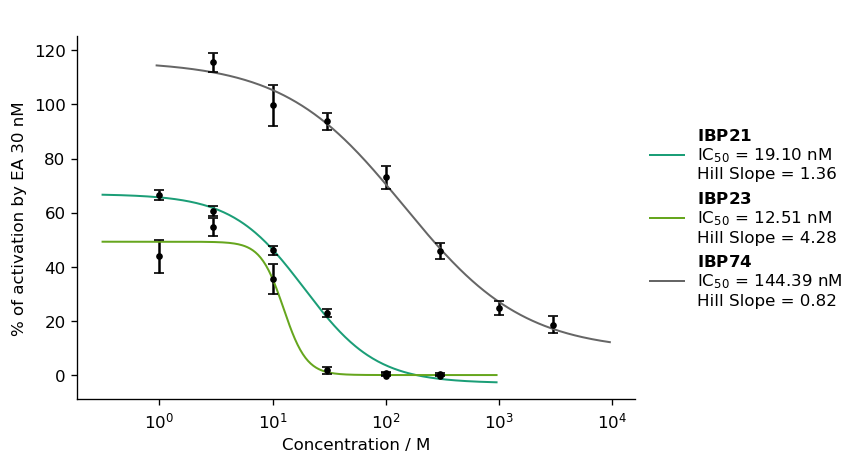

In [37]:
plates.plot_curve('ic50', combine_plates = True, combine = True, use_normalised = True, activator = 'EA 30 nM')

### export_data() ###
As for a single plate, this method will export data produced at each stage of the analysis to an excel document. The data sets are placed into separate sheets. <br>
The title of the excel file can be set as an argument within the export_data function. If no title is specified, the resulting document will be named after the title of each plate (the title of the plate can be set in the first step - see top of the page). <br>
There is also a second argument 'combine_plates'. Setting this to False will produce separate excel files for each plate. If combine_plates is set to True, a single Excel document will be created containing the data for every plate. Separate sheets will be produced for each protein-compound combination across the plates.



In [38]:
# plates.export_data(combine_plates = True)